In [1]:
import numpy as np
import os
import shutil

import IPython
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook
from sklearn.model_selection import train_test_split

%matplotlib inline
matplotlib.style.use('ggplot')

print('package done!')

package done!


D:\Applications\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
meta_data = pd.read_csv("E:/Urban Sound/UrbanSound8k.csv")
meta_data[10:]

,slice_file_name,fsID,start,end,salience,fold,classID,class
10,100648-1-1-0.wav,100648,8.998279,10.052132,2,10,1,car_horn
11,100648-1-2-0.wav,100648,16.699509,17.104837,2,10,1,car_horn
12,100648-1-3-0.wav,100648,17.631764,19.253075,2,10,1,car_horn
13,100648-1-4-0.wav,100648,25.332994,27.197502,2,10,1,car_horn
14,100652-3-0-0.wav,100652,0.000000,4.000000,1,2,3,dog_bark
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [4]:
print(f"Total Training Data: {meta_data.shape[0]} \n Number of classes = {len(meta_data['class'].unique())}")

Total Training Data: 8732 
 Number of classes = 10


In [5]:
print(meta_data['class'].unique())

['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


In [6]:
##Distribution of category
category_group = meta_data.groupby(['class']).count()

In [7]:
category_group

,slice_file_name,fsID,start,end,salience,fold,classID
class,,,,,,,
air_conditioner,1000,1000,1000,1000,1000,1000,1000
car_horn,429,429,429,429,429,429,429
children_playing,1000,1000,1000,1000,1000,1000,1000
dog_bark,1000,1000,1000,1000,1000,1000,1000
drilling,1000,1000,1000,1000,1000,1000,1000
engine_idling,1000,1000,1000,1000,1000,1000,1000
gun_shot,374,374,374,374,374,374,374
jackhammer,1000,1000,1000,1000,1000,1000,1000
siren,929,929,929,929,929,929,929


In [8]:
#plot = category_group.unstack()
#plot[:60]

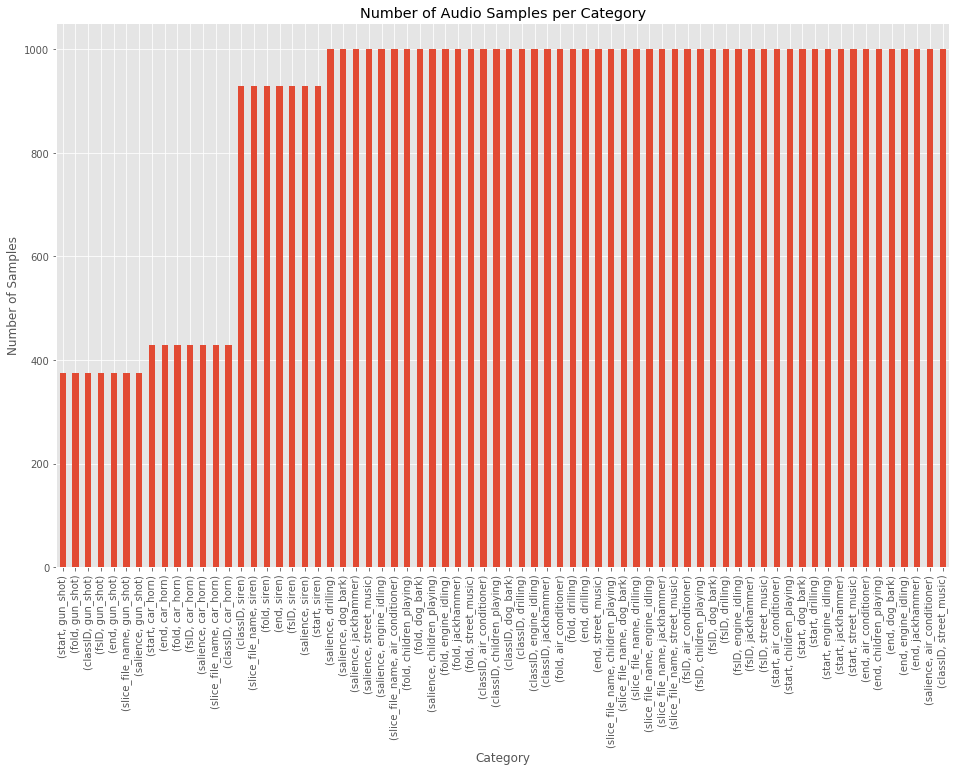

In [9]:
plot = category_group.unstack().reindex(category_group.unstack().sort_values().index)\
          .plot(kind='bar', stacked=True, title="Number of Audio Samples per Category", figsize=(16,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

In [10]:
print('Minimum samples per category = ', min(meta_data['class'].value_counts()))
print('Maximum samples per category = ', max(meta_data['class'].value_counts()))

Minimum samples per category =  374
Maximum samples per category =  1000


In [11]:
###Audo Directory
Data_dir = "E:/Urban Sound/Data/"

In [12]:
len(os.listdir(Data_dir))

10

In [13]:
meta_data[60:120]

,slice_file_name,fsID,start,end,salience,fold,classID,class
60,101382-2-0-29.wav,101382,14.500000,18.500000,1,10,2,children_playing
61,101382-2-0-33.wav,101382,16.500000,20.500000,1,10,2,children_playing
62,101382-2-0-42.wav,101382,21.000000,25.000000,1,10,2,children_playing
63,101382-2-0-45.wav,101382,22.500000,26.500000,1,10,2,children_playing
64,101415-3-0-2.wav,101415,1.000000,5.000000,1,1,3,dog_bark
65,101415-3-0-3.wav,101415,1.500000,5.500000,1,1,3,dog_bark
66,101415-3-0-8.wav,101415,4.000000,8.000000,1,1,3,dog_bark
67,101729-0-0-1.wav,101729,0.500000,4.500000,2,9,0,air_conditioner
68,101729-0-0-11.wav,101729,5.500000,9.500000,2,9,0,air_conditioner
69,101729-0-0-12.wav,101729,6.000000,10.000000,2,9,0,air_conditioner


In [14]:
###Readind Audio .wav file
import IPython.display as ipd
fname = Data_dir +'fold1/' + '102842-3-1-6.wav'
ipd.Audio(fname)

In [15]:
#using wave library
import wave
wav = wave.open(fname)
print(f"Sampling (frame) rate = {wav.getframerate()}")
print(f"Total Samples (frames) = {wav.getnframes()}")
print(f"Duration = {wav.getnframes()/ wav.getframerate()}")

Sampling (frame) rate = 44100
Total Samples (frames) = 176400
Duration = 4.0


In [16]:
# Using scipy
from scipy.io import wavfile
rate, audio = wavfile.read(fname)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", audio.shape)
print(audio)

Sampling (frame) rate =  44100
Total samples (frames) =  (176400, 2)
[[-485 -245]
 [-356 -233]
 [-341 -280]
 ...
 [-171 -214]
 [-214 -164]
 [-305 -174]]


In [17]:
len(audio.shape)

2

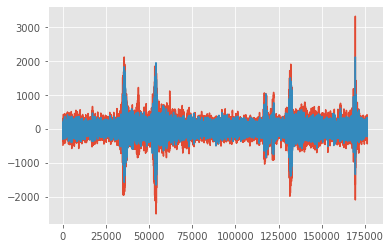

In [18]:
plt.plot(audio,'-');

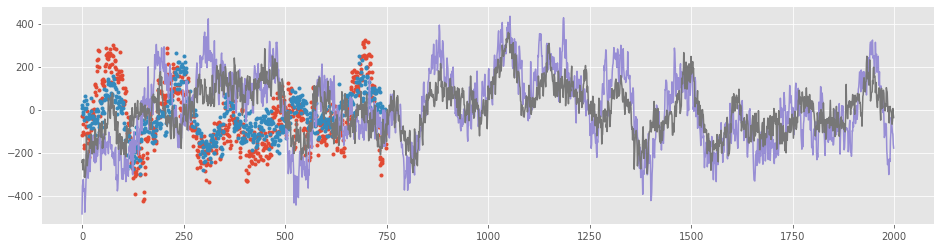

In [19]:
plt.figure(figsize=(16, 4))
plt.plot(audio[1250:2000], '.'); plt.plot(audio[:2000], '-');

In [20]:
meta_data[600:660]

,slice_file_name,fsID,start,end,salience,fold,classID,class
600,109711-3-2-4.wav,109711,14.001624,18.001624,1,4,3,dog_bark
601,109711-3-2-6.wav,109711,15.001624,19.001624,1,4,3,dog_bark
602,110134-3-0-0.wav,110134,0.000000,1.130113,1,8,3,dog_bark
603,110371-3-0-1.wav,110371,0.790852,4.790852,1,5,3,dog_bark
604,110371-3-1-0.wav,110371,15.269745,19.269745,1,5,3,dog_bark
605,110371-3-1-1.wav,110371,15.769745,19.769745,1,5,3,dog_bark
606,110389-3-0-0.wav,110389,0.000000,0.552041,1,9,3,dog_bark
607,110621-7-0-0.wav,110621,0.000000,4.000000,1,4,7,jackhammer
608,110621-7-0-1.wav,110621,0.500000,4.500000,1,4,7,jackhammer
609,110621-7-0-2.wav,110621,1.000000,5.000000,1,4,7,jackhammer


The audio file sampling rate is not same for all the file.So we need to open all the file at same framerate

In [26]:
wav_file = Data_dir + 'fold6/' + '111386-5-1-2.wav'
wav = wave.open(wav_file)
print(f"Sampling (frame) rate = {wav.getframerate()}")
print(f"Total Samples (frames) = {wav.getnframes()}")
print(f"Duration = {wav.getnframes()/ wav.getframerate()}")
print(f"Number of audio channels: {wav.getnchannels()}")
print(f"Sample Width: {wav.getsampwidth()}")
print(f"Compression Type: {wav.getcomptype()}")
print(f"Compression Name: {wav.getcompname()}")
print(f"Parameters: {wav.getparams()}")

Sampling (frame) rate = 44100
Total Samples (frames) = 176400
Duration = 4.0
Number of audio channels: 2
Sample Width: 2
Compression Type: NONE
Compression Name: not compressed
Parameters: _wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=176400, comptype='NONE', compname='not compressed')


In [27]:
#dog-bark: f1,f2,f3,f4,f5,f6,f8,f9,f10 ok- f4,f5 not ok
#gun-shot f1, ok-- 
#street music f1,f4,f5,f6,f7 ok - f5 not ok
#children f1,f2,f5,f6,f10 ok-  f1 not ok
##car-horn f10 ok-
##air condition  fold 5 ok- f9 not ok
#siren : f2,f5,f7 ok-
#engine: f2,f3,f5,f6f8,,f10 ok- f1,f2,f9,f10 not ok
#jackhammer:  f5,f9 ok- f1 not ok
#driling: f3,f6 ok- f2,f3,f7 not ok

In [28]:
rate, audio = wavfile.read(wav_file)
print("Sampling (frame) rate = ", rate)
print("Total samples (frames) = ", audio.shape)
print(audio)

Sampling (frame) rate =  44100
Total samples (frames) =  (176400, 2)
[[4866 2991]
 [4314 2465]
 [3620 2342]
 ...
 [2180  441]
 [2478  791]
 [2446  921]]


In [ ]:
def convert_frame_rate(Data_dir):
    
    

In [61]:
%%time
feature = []
label = []

def load_data():
    for i in range(8732):
        file_name = Data_dir + '/fold' + str(meta_data['fold'][i]) + '/' + meta_data["slice_file_name"][i]
        rate,audio = wavfile.read(file_name)
        print("Total samples (frames) = ", audio.shape[0])

    

Wall time: 0 ns


In [62]:
temp = load_data()

Total samples (frames) =  14004
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  28600
Total samples (frames) =  46305
Total samples (frames) =  17875
Total samples (frames) =  71442
Total samples (frames) =  82026
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (frames) =  176400
Total samples (f

ValueError: Unsupported bit depth: the wav file has 24-bit data.